### This project Involved the Analysis of Sentiments from over 74,000 X tweets using NLP techniques and training a model to predict the sentiments attached to tweets using Random Forest Algorithms

In [40]:
# Importing NLTK and pandas libraries
import nltk
from nltk import word_tokenize # word tokenizer
from nltk.stem import PorterStemmer # stemmer
from nltk.stem.wordnet import WordNetLemmatizer # lemmatizer
from nltk.corpus import stopwords  # stopwords
import re  # regular expression

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
# Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/Data Science and Analytics/WTF Data Science and AI/Datasets/ML, DL, NLP/twitter_training.csv', header=None, index_col=[0])

__Let's Take a Look at the DataFrame__

In [ ]:
df

,1,2,3
0,,,
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...
2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...
9200,Nvidia,Positive,Just realized that the Windows partition of my...
9200,Nvidia,Positive,Just realized that my Mac window partition is ...
9200,Nvidia,Positive,Just realized the windows partition of my Mac ...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74682 entries, 2401 to 9200
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       74682 non-null  object
 1   2       74682 non-null  object
 2   3       73996 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


In [51]:
# Renaming the columns to make them more understandable
df.columns = ['Account','Label','Tweet']

In [ ]:
df.head(3)

,Account,Label,Tweet
0,,,
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...


### Data Cleaning

In [ ]:
#Checking for Null Values
round(df.isna().sum()/df.shape[0], 2)

Account    0.00
Label      0.00
Tweet      0.01
dtype: float64

In [ ]:
# The null values are quite insignificant, so we'll drop them
df.dropna(inplace=True)

In [ ]:
# Checking for duplicated tweets
round(df.duplicated().sum()/df.shape[0], 2)

0.04

In [ ]:
# dropping duplicated tweets
df.drop_duplicates(inplace=True)

In [17]:
stemmer = PorterStemmer()
nltk.download('stopwords')
en_stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Clean Tweets

In [18]:
# defining a function to clean the tweets
def clean(string):
  string = string.lower()
  clean_string = re.sub('[^a-z1-9 ]', '', string) #punctuation removal

  # tokens
  temp = []
  tokens = word_tokenize(clean_string)
  for token in tokens:
    if token not in en_stopwords: #stopwords removal
      temp.append(stemmer.stem(token)) #stemming

  # join
  return ' '.join(temp)

In [22]:
x = df.Tweet # tweets
x.head()

0
2401    im getting on borderlands and i will murder yo...
2401    I am coming to the borders and I will kill you...
2401    im getting on borderlands and i will kill you ...
2401    im coming on borderlands and i will murder you...
2401    im getting on borderlands 2 and i will murder ...
Name: Tweet, dtype: object

In [23]:
y = df.Label # sentiments
y.head()

0
2401    Positive
2401    Positive
2401    Positive
2401    Positive
2401    Positive
Name: Label, dtype: object

In [26]:
# Cleaning the tweets
nltk.download('punkt')
x = x.apply(clean)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [29]:
# here's what the tweets look like after cleaning
x.head()

0
2401      im get borderland murder
2401              come border kill
2401        im get borderland kill
2401     im come borderland murder
2401    im get borderland 2 murder
Name: Tweet, dtype: object

### Visualization

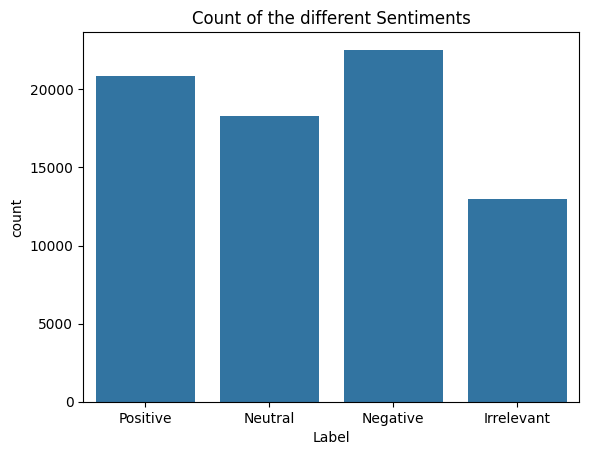

In [52]:
sns.countplot(x=df.Label)
plt.title('Count of the different Sentiments')
plt.show()

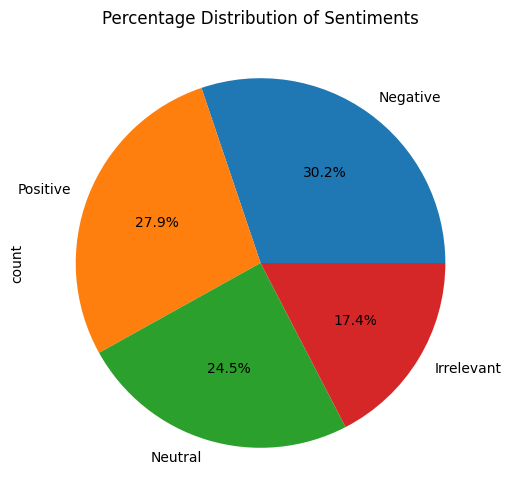

In [54]:
plt.figure(figsize=(10, 6))
df.Label.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage Distribution of Sentiments')
plt.show()

__Modeling__

In [30]:
# importing sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
# splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
# Bag of Words
bow_vectorizer = CountVectorizer()

In [33]:
x_train = bow_vectorizer.fit_transform(x_train).toarray()

In [34]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [35]:
x_train.shape
# there are over 30,000 unique words

(56766, 30993)

In [36]:
# Random Forest Classifier
clf = RandomForestClassifier()

In [42]:
# Model Training
clf.fit(x_train, y_train)

RandomForestClassifier()

In [43]:
clf.score(x_train, y_train)

0.9794595356375295

In [44]:
# Transforming the test dataset
x_test = bow_vectorizer.transform(x_test).toarray()

In [45]:
# Prediction
predY = clf.predict(x_test)

In [46]:
confusion_matrix(y_test, predY)

array([[2121,  124,   53,  217],
       [  28, 4005,   70,  180],
       [  27,  168, 3109,  240],
       [  40,  113,   94, 3603]])

In [47]:
print(classification_report(y_test, predY))

              precision    recall  f1-score   support

  Irrelevant       0.96      0.84      0.90      2515
    Negative       0.91      0.94      0.92      4283
     Neutral       0.93      0.88      0.91      3544
    Positive       0.85      0.94      0.89      3850

    accuracy                           0.90     14192
   macro avg       0.91      0.90      0.90     14192
weighted avg       0.91      0.90      0.90     14192

